
# Short-term synaptic plasticity: simulate Tsodyks & Markram model


In [1]:
import matplotlib.pyplot as plt
import nest
import nest.voltage_trace
from numpy import exp
%matplotlib inline


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.5
 Built: Jul 12 2023 08:11:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



# Parameter setting for STD dominated regime

In [2]:
resolution = 0.1  # simulation step size (ms)
Tau = 40.0  # membrane time constant
Theta = 15.0  # threshold
E_L = 0.0  # reset potential of membrane potential
R = 0.1  # 100 M Ohm
C = Tau / R  # Tau (ms)/R in NEST units
TauR = 2.0  # refractory time
Tau_psc = 3.0  # time constant of PSC (= Tau_inact)
Tau_rec = 800.0  # depression time
Tau_fac = 0.0  # facilitation time
U = 0.5  # facilitation parameter U
A = 250.0  # PSC weight in pA
f = 20.0 / 1000.0  # frequency in Hz converted to 1/ms
Tend = 1200.0  # simulation time
TIstart = 50.0  # start time of dc
TIend = 1050.0  # end time of dc
I0 = Theta * C / Tau / (1 - exp(-(1 / f - TauR) / Tau))  # dc amplitude

neuron_param = {
    "tau_m": Tau,
    "t_ref": TauR,
    "tau_syn_ex": Tau_psc,
    "tau_syn_in": Tau_psc,
    "C_m": C,
    "V_reset": E_L,
    "E_L": E_L,
    "V_m": E_L,
    "V_th": Theta,
}

syn_param = {
    "tau_psc": Tau_psc,
    "tau_rec": Tau_rec,
    "tau_fac": Tau_fac,
    "U": U,
    "delay": 0.1,
    "weight": A,
    "u": 0.0,
    "x": 1.0,
}

In [3]:
nest.ResetKernel()
nest.resolution = resolution


Dec 15 09:44:15 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


In [4]:
# create 2 neurons and the needed devices
neurons = nest.Create("iaf_psc_exp", 2)
dc_gen = nest.Create("dc_generator")
volts = nest.Create("voltmeter")

In [5]:
# set neurons params
neurons.set(neuron_param)
# set input current 
dc_gen.set(amplitude=I0, start=TIstart, stop=TIend)
volts.set(label="voltmeter", interval=1.0)

In [6]:
# connect the devices
nest.Connect(dc_gen, neurons[0])
nest.Connect(volts, neurons[1])

In [7]:
# connection netween neurons
nest.CopyModel("tsodyks_synapse", "syn", syn_param)
nest.Connect(neurons[0], neurons[1], syn_spec="syn")

Finally, we simulate the configuration using the command ``Simulate``,
where the simulation time `Tend` is passed as the argument.  We plot the
target neuron's membrane potential as a function of time.




Dec 15 09:44:15 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Dec 15 09:44:15 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1200
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Dec 15 09:44:15 SimulationManager::run [Info]: 
    Simulation finished.


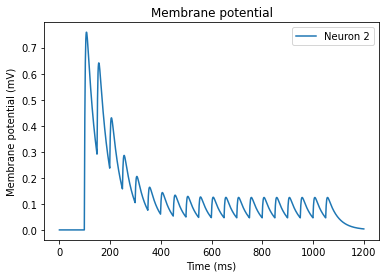

In [8]:
nest.Simulate(Tend)
nest.voltage_trace.from_device(volts)
plt.show()

# Parameter setting for STF dominated regime

In [16]:
resolution = 0.1  # simulation step size (ms)
Tau = 40.0  # membrane time constant
Theta = 15.0  # threshold
E_L = 0.0  # reset potential of membrane potential
R = 1.0  # membrane resistance (GOhm)
C = Tau / R  # Tau (ms)/R in NEST units
TauR = 2.0  # refractory time
Tau_psc = 1.5  # time constant of PSC (= Tau_inact)
Tau_rec = 130.0  # depression time
Tau_fac = 530.0  # facilitation time
U = 0.03  # facilitation parameter U
A = 1540.0  # PSC weight in pA
f = 20.0 / 1000.0  # frequency in Hz converted to 1/ms
Tend = 1200.0  # simulation time
TIstart = 50.0  # start time of dc
TIend = 1050.0  # end time of dc
I0 = Theta * C / Tau / (1 - exp(-(1 / f - TauR) / Tau))  # dc amplitude

neuron_param = {
    "tau_m": Tau,
    "t_ref": TauR,
    "tau_syn_ex": Tau_psc,
    "tau_syn_in": Tau_psc,
    "C_m": C,
    "V_reset": E_L,
    "E_L": E_L,
    "V_m": E_L,
    "V_th": Theta,
}

syn_param = {
    "tau_psc": Tau_psc,
    "tau_rec": Tau_rec,
    "tau_fac": Tau_fac,
    "U": U,
    "delay": 0.1,
    "weight": A,
    "u": 0.0,
    "x": 1.0,
}

In [10]:
nest.ResetKernel()
nest.resolution = resolution


Dec 15 09:46:00 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


In [11]:
neurons = nest.Create("iaf_psc_exp", 2)
dc_gen = nest.Create("dc_generator")
volts = nest.Create("voltmeter")

In [12]:
neurons.set(neuron_param)
dc_gen.set(amplitude=I0, start=TIstart, stop=TIend)
volts.set(label="voltmeter", interval=1.0)

In [13]:
nest.Connect(dc_gen, neurons[0])
nest.Connect(volts, neurons[1])

In [14]:
nest.CopyModel("tsodyks_synapse", "syn", syn_param)
nest.Connect(neurons[0], neurons[1], syn_spec="syn")


Dec 15 09:46:27 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Dec 15 09:46:27 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1200
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Dec 15 09:46:27 SimulationManager::run [Info]: 
    Simulation finished.


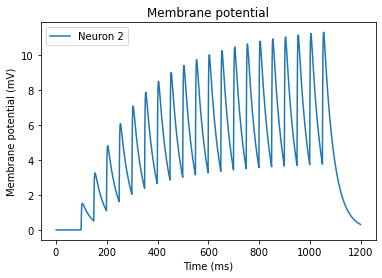

In [15]:
nest.Simulate(Tend)
nest.voltage_trace.from_device(volts)
plt.show()